# 1-Question:

Your Friend has developed the Product and he wants to establish the product startup
and he is searching for a perfect location where getting the investment has a high chance.
But due to its financial restriction, he can choose only between 
three locations -  Bangalore, Mumbai, and NCR. As a friend, 
you want to help your friend deciding the location. 
NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done.
That means, find the location where startups has received funding maximum number of times.
Plot the bar graph between location and number of funding. 
Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. 
That means, at some place instead of "Bangalore", "bangalore" is given.
Take city name as "Bangalore". For few startups multiple locations are given,
one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

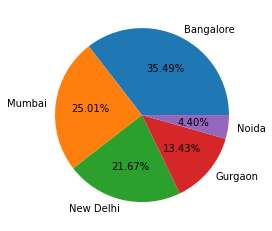

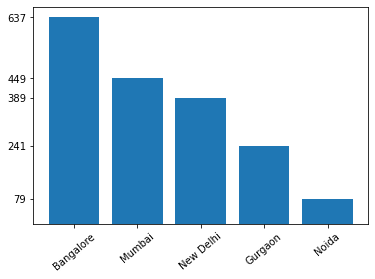

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read startup_funding.csv file using pandas
data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv")
df = data.copy()

# drop null values from CityLocation column 
df.drop(df.index[df.CityLocation.isnull()], inplace = True)

# correct spelling usning replace function
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)

# store Bangalore,Mumbai,Gurgaon,Noida and New Delhi and 
# startups has received funding maximum number of times using Dict 
dic = {}
for i in df['CityLocation']:
    if 'Bangalore' in i:
        dic['Bangalore'] = dic.get('Bangalore', 0) + 1
    elif 'Mumbai' in i:
        dic['Mumbai'] = dic.get('Mumbai', 0) + 1
    elif 'Gurgaon' in i:
        dic['Gurgaon'] = dic.get('Gurgaon', 0) + 1
    elif 'Noida' in i:
        dic['Noida'] = dic.get('Noida', 0) + 1
    elif 'New Delhi' in i:
        dic['New Delhi'] = dic.get('New Delhi', 0) + 1

# stored cities in X and stored received_funding maximum number of times for each city in Y
x = list(dic.keys())
y = list(dic.values())

# create np array by X and Y
np_x = np.array(x)
np_y = np.array(y)

# sort np_x array with the help of np_y using argsort fun
np_x = np_x[np.argsort(np_y)]
# sort np_y array
np_y = np.sort(np_y)

# extact top 5 cities where startups has received funding maximum number of times
np_x = np_x[len(np_x)-1:-1-5:-1]
np_y = np_y[len(np_y)-1:-1-5:-1]

# Plot the pie graph between location and number of funding
plt.pie(np_y, labels= np_x, autopct = '%.2f%%')
plt.show()

# Plot the bar graph between location and number of funding
plt.bar(np_x, np_y)
plt.xticks(rotation = 40)
plt.yticks(np_y)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

# 2- Question

Even after trying for so many times, your friend’s startup could not find the investment.
So you decided to take this matter in your hand and try to find the list of investors
who probably can invest in your friend’s startup. 
Your list will increase the chance of your friend startup getting some initial investment 
by contacting these investors. 
Find the top 5 investors who have invested maximum number of times 
(consider repeat investments in one company also).
In a startup, multiple investors might have invested. 
So consider each investor for that startup. Ignore undisclosed investors.

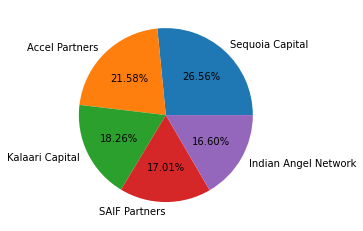

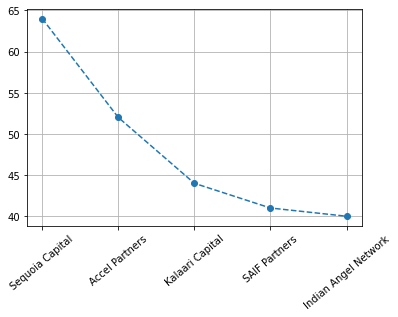

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read startup_funding.csv file using pandas
data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv")
df = data.copy()

# create np array by InvestorsName column and dtype is string
np_investor = np.array(df.InvestorsName, dtype = 'str') 

# create a list all the investors who have invested In a startup
investors = []
for row in np_investor:
    # Ignore undisclosed investors
    if 'Undisclosed' not in row or 'undisclosed' in row:
        val = row.split(',')
        for name in val:
            investors.append(name.strip())

# stored investors in Dict.keys and 
# stored maximum number of times invested In a startup for each investor in Dict.values
Dict = {}
for key in investors:
    if key in Dict:
        Dict[key] += 1
    else:
        Dict[key] = 1

# stored investors in X-list who have invested In a startup by Dict.keys
x = list(Dict.keys())
# stored values of maximum number of times invested In a startup for each investor by Dict.values
y = list(Dict.values())

np_x = np.array(x)
np_y = np.array(y)

# sort np_x array with the help of np_y using argsort fun
np_x = np_x[np.argsort(np_y)]
# sort np_y array
np_y = np.sort(np_y)

# extact top 5 investors who have invested maximum number of times in a startup
np_x = np_x[len(np_x)-1: len(np_x) -1-5 : -1]
np_y = np_y[len(np_y)-1: len(np_y) -1-5 : -1]

# plot pie graph using np_y and np_x array
plt.pie(np_y, labels= np_x, autopct = '%.2f%%')
plt.show()

# plot line graph
plt.plot(np_x, np_y, 'o--')
plt.grid()
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

# 3- Question

After re-analysing the dataset you found out that some investors have invested 
in the same startup at different number of funding rounds. 
So before finalising the previous list, you want to improvise it by finding the top 5 investors 
who have invested in different number of startups. This list will be more helpful 
than your previous list in finding the investment for your friend startup. 
Find the top 5 investors who have invested maximum number of times in different companies.
That means, if one investor has invested multiple times in one startup, 
count one for that company. There are many errors in startup names. 
Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

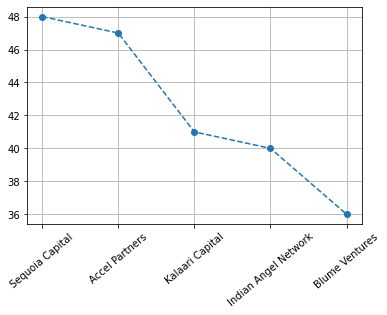

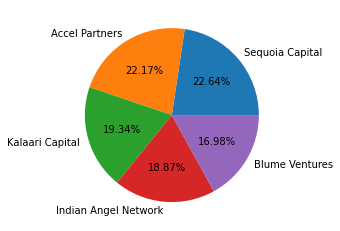

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read startup_funding.csv file using pandas
data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv")
df = data.copy()

# drop null values from InvestorsName column 
df.drop(df.index[df.InvestorsName.isnull()], inplace = True)

# drop 'Undisclosed Investors' values from InvestorsName column 
df.drop(df.index[df.InvestorsName == 'Undisclosed Investors'], inplace = True)

# drop null values from StartupName column 
df.drop(df.index[df.StartupName.isnull()], inplace = True)

# correct spelling mistakes- Ola, Flipkart, Oyo and Paytm using replace fun
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True) 
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

        
# create np array by InvestorsName column and dtype is string       
np_investor = np.array(df.InvestorsName, dtype = 'str')

# create np array by StartupName column and dtype is string
np_startup = np.array(df.StartupName, dtype = 'str')

# stored investors who have invested maximum number of times in different companies in Dict.keys and 
# stored values of invested maximum number of times in different companies in Dict.values
Dict = {}
for i in range(len(np_investor)):
    investor = np_investor[i].strip()
    if "," in investor:
        val = investor.strip().split(',')
        for name in val:
            if name.strip() in Dict:
                Dict[name.strip()].add(np_startup[i].strip())
            else:
                s = set()
                Dict[name.strip()] = s
                Dict[name.strip()].add(np_startup[i].strip())
    else:
        name = investor.strip()
        if name in Dict:
            Dict[name].add(np_startup[i].strip())
        else:
            s = set()
            Dict[name] = s
            Dict[name].add(np_startup[i].strip())
            
            
investor = {}
for key in Dict:
    if key == "":
        continue
    investor[key] = len(Dict[key])

# stored investors in X-list who have invested In  different companies by Dict.keys
# stored values of invested maximum number of times in different companies
# for each investor by Dict.values
x = list(investor.keys())
y = list(investor.values())

np_x = np.array(x)
np_y = np.array(y)

np_x = np_x[np.argsort(np_y)]
np_y  = np.sort(np_y)

# extact top 5 investors who have invested maximum number of times in different companies startup
np_x = np_x[len(np_x)-1: len(np_x) -1-5 : -1]
np_y = np_y[len(np_y)-1: len(np_y) -1-5 : -1]

# plot line graph between top 5 investors and 
# thair invested maximum number of times in different companies startup
plt.plot(np_x, np_y, "o--")
plt.grid()
plt.xticks(rotation = 40)
plt.show()

# plot a pie graph 
plt.pie(np_y, labels = np_x, autopct = "%.2f%%")
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

# 4- Question

Even after putting so much effort in finding the probable investors, 
it didn't turn out to be helpful for your friend. 
So you went to your investor friend to understand the situation better and your investor friend 
explained to you about the different Investment Types and their features. 
This new information will be helpful in finding the right investor. 
Since your friend startup is at an early stage startup,
the best-suited investment type would be - Seed Funding and Crowdfunding.
Find the top 5 investors who have invested in a different number of startups
and their investment type is Crowdfunding or Seed Funding.
Correct spelling of investment types are -
"Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
There are many errors in startup names. Ignore correcting all, 
just handle the important ones - Ola, Flipkart, Oyo and Paytm.

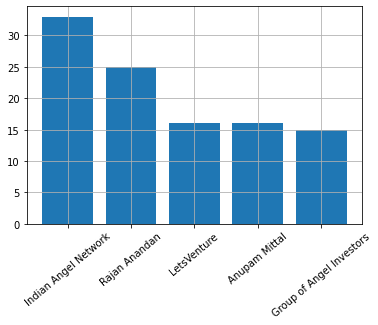

Indian Angel Network 33
Rajan Anandan 25
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 15


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read startup_funding.csv file using pandas
data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv")
df = data.copy()

# drop null values from InvestmentType column 
df.drop(df.index[df.InvestmentType.isnull()], inplace = True )
# reset index
df.reset_index(inplace = True, drop = True)

# handle spelling mistakes in InvestmentType col
df.loc[df.InvestmentType == 'PrivateEquity', 'InvestmentType'] = "Private Equity"
df.loc[df.InvestmentType == 'SeedFunding', 'InvestmentType'] = "Seed Funding"
df.loc[df.InvestmentType == 'Crowd funding', 'InvestmentType'] = "Crowd Funding"

# create np array by InvestorsName column and dtype is string
np_investor = np.array(df.InvestorsName, dtype = 'str') 

# all investors who have invested in a different number of startups and
# their investment type is Crowdfunding or Seed Funding.
investors = []
for i in range(len(np_investor)):
    if df['InvestmentType'][i] == "Seed Funding" or df['InvestmentType'][i] == "Crowd Funding":
        if 'Undisclosed' not in np_investor[i] or 'undisclosed' in np_investor[i]:
            if "," in np_investor[i]:
                val = np_investor[i].split(',')
                for name in val:
                    investors.append(name.strip())
            else:
                investors.append(np_investor[i].strip())
                
                
# stored investors in Dict.keys and 
# stored values maximum number of times invested In a startup and 
#  their investment type is Crowdfunding or Seed Funding for each investor in Dict.values
Dict = {}
for key in investors:
    if key in Dict:
        Dict[key] += 1
    else:
        Dict[key] = 1

del Dict[""]

x = list(Dict.keys())
y = list(Dict.values())

np_x = np.array(x)
np_y = np.array(y)

# sort the np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

np_x = np_x[len(np_x)-1: len(np_x) -1-5 : -1]
np_y = np_y[len(np_y)-1: len(np_y) -1-5 : -1]

# plot bar graph between investors and maximum number of times invested In a startup and 
# their investment type is Crowdfunding or Seed Funding for each investor 
plt.bar(np_x, np_y)
plt.grid()
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

# 5- Question

Due to your immense help, your friend startup successfully got seed funding and 
it is on the operational mode. Now your friend wants to expand his startup and 
he is looking for new investors for his startup. Now you again come as a saviour to
help your friend and want to create a list of probable new new investors.
Before moving forward you remember your investor friend advice that 
finding the investors by analysing the investment type. Since your friend startup 
is not in early phase it is in growth stage so the best-suited investment type is Private Equity.
Find the top 5 investors who have invested in a different number of startups and
their investment type is Private Equity. Correct spelling of investment types are 

- "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding".

Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
There are many errors in startup names. 
Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

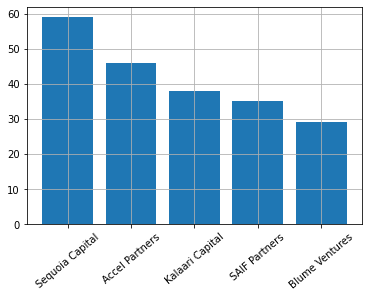

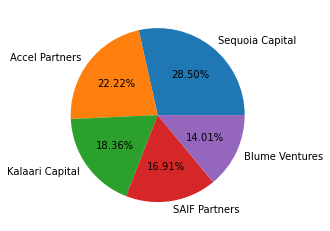

Sequoia Capital 59
Accel Partners 46
Kalaari Capital 38
SAIF Partners 35
Blume Ventures 29


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read startup_funding.csv file using pandas
data = pd.read_csv("C://Users//91902//Desktop//Datasets//startup_funding.csv")
df = data.copy()

# drop null values from InvestmentType column 
df.drop(df.index[df.InvestmentType.isnull()], inplace = True )
# reset index
df.reset_index(inplace = True, drop = True)

# handle spelling mistakes
df.loc[df.InvestmentType == 'PrivateEquity', 'InvestmentType'] = "Private Equity"
df.loc[df.InvestmentType == 'SeedFunding', 'InvestmentType'] = "Seed Funding"
df.loc[df.InvestmentType == 'Crowd funding', 'InvestmentType'] = "Crowd Funding"

np_investor = np.array(df.InvestorsName, dtype = 'str')

# create investors list of all the investors who have invested in a different companies and
# their investment type is a Private Equity 
investors = []
for i in range(len(np_investor)):
    if df['InvestmentType'][i] == "Private Equity":
        if 'Undisclosed' not in np_investor[i] or 'undisclosed' in np_investor[i]:
            if "," in np_investor[i]:
                val = np_investor[i].split(',')
                for name in val:
                    investors.append(name.strip())
            else:
                investors.append(np_investor[i].strip())
                

# stored investors in Dict.keys and 
# stored values maximum number of times invested In a different startup and 
#  their investment type is Private Equity for each investor in Dict.values                
Dict = {}
for key in investors:
    if key in Dict:
        Dict[key] += 1
    else:
        Dict[key] = 1

del Dict[""]

x = list(Dict.keys())
y = list(Dict.values())

np_x = np.array(x)
np_y = np.array(y)

# sort the np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

np_x = np_x[len(np_x)-1: len(np_x) -1-5 : -1]
np_y = np_y[len(np_y)-1: len(np_y) -1-5 : -1]


# plot bar graph between investors and maximum number of times invested In a different startup and 
# their investment type is Private Equity for each investor 
plt.bar(np_x, np_y)
plt.grid()
plt.xticks(rotation = 40)
plt.show()

# create a pie graph
plt.pie(np_y, labels = np_x, autopct = "%.2f%%")
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])